In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats 

# Task 1: Merging 12 months of data file into a single csv file

In [10]:
df = pd.read_csv("E:\Sales_Data\Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
files = [file for file in os.listdir("E:/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files :
    df= pd.read_csv("E:/Sales_Data/" +file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("p2_data.csv",index= False)




In [4]:
p2_data = pd.read_csv("p2_data.csv")
p2_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up the data, drop the rows of NaNs

In [5]:
nan_df = p2_data[p2_data.isna().any(axis=1)]
p2_data = p2_data.dropna(how='all')
p2_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Augment data with additional column
# Add Month column

In [8]:
p2_data['Month']= p2_data['Order Date'].str[0:2]
p2_data['Month']=pd.to_numeric(p2_data['Month'])
p2_data.head()

ValueError: Unable to parse string "Or" at position 517

# Clearing Up the Or values

In [6]:
Or_data= p2_data[p2_data['Order Date'].str[0:2]=='Or']
p2_data = p2_data.drop(Or_data.index)
p2_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
p2_data['Month']= p2_data['Order Date'].str[0:2]
p2_data['Month']=p2_data['Month'].astype('int32')
p2_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Q1: What was the best month for sales and how much was earned that month?

In [8]:
# sales = Quantity Ordered * Price Each
p2_data["Quantity Ordered"]=pd.to_numeric(p2_data["Quantity Ordered"])
p2_data["Price Each"]=pd.to_numeric(p2_data["Price Each"])

p2_data['Sales']= p2_data["Quantity Ordered"]*p2_data["Price Each"]


In [9]:
results=p2_data.groupby('Month')[["Quantity Ordered", "Price Each", "Sales"]].sum()
print(results)

       Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


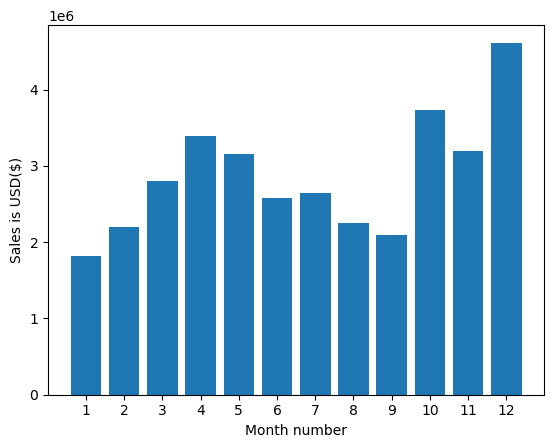

In [11]:
months= range(1,13)
plt.bar(months,results['Sales']) 
plt.xticks(months)
plt.ylabel("Sales is USD($)")
plt.xlabel("Month number")
plt.show()

# Q2 : What city had the highest number of sales

In [12]:
p2_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [10]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


p2_data['City']= p2_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


p2_data.groupby('City')[['Sales']].sum()

,Sales
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


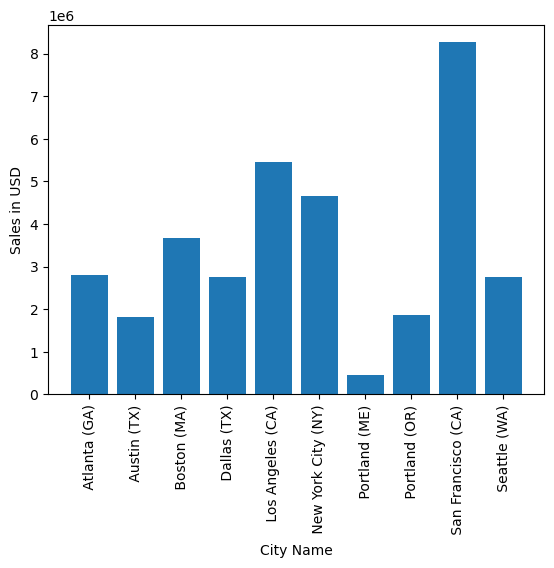

In [19]:
result_2 = p2_data.groupby('City')[['Sales']].sum()
cities= sorted(p2_data['City'].unique()) # Alphabetically sorted like we got in "result_2'

plt.bar(cities,result_2["Sales"])
plt.xticks(cities,rotation='vertical')
plt.xlabel("City Name")
plt.ylabel("Sales in USD")
plt.show()


In [20]:
cities = p2_data['City'].drop_duplicates().tolist()
print(cities) # DataFrame e jeivabe ase, oivabe sort kora

[' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)', ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)', ' New York City (NY)', ' Portland (OR)', ' Austin (TX)', ' Portland (ME)']


# Q4: what product do you think sold the most? Why do you think it sold the most?

In [21]:
p2_data.groupby("Product")[['Quantity Ordered']].sum()

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


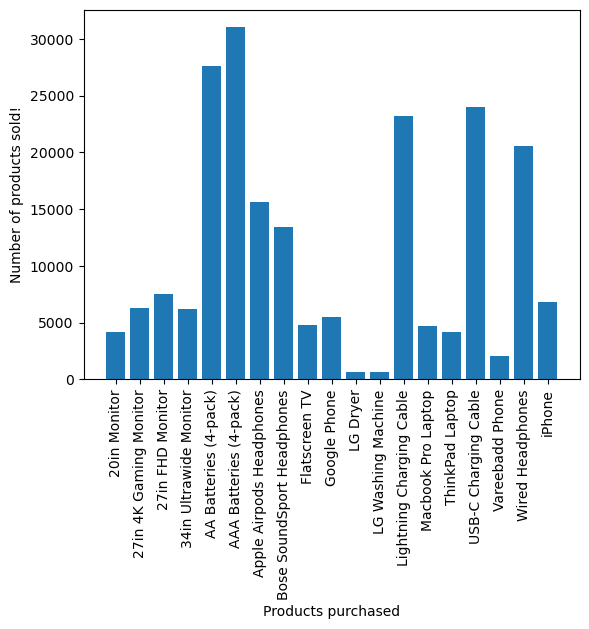

In [22]:
result_3 = p2_data.groupby("Product")[['Quantity Ordered']].sum()
products= sorted(p2_data['Product'].unique())
plt.bar(products,result_3['Quantity Ordered'])
plt.xticks(products,rotation='vertical')
plt.xlabel("Products purchased")
plt.ylabel("Number of products sold!")
plt.show()

# Now onto why it was sold the most?

In [43]:
p2_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [45]:
prices=p2_data.groupby('Product')['Price Each'].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


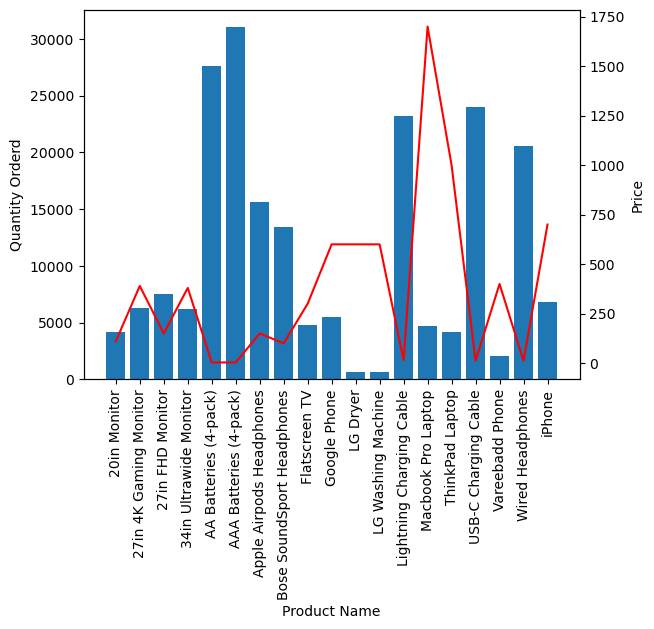

In [23]:
prices=p2_data.groupby('Product')['Price Each'].mean()

fig1, ax1 = plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,result_3['Quantity Ordered']) 
ax2.plot(products,prices, 'r-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel("Quantity Orderd")
ax2.set_ylabel("Price")

ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products,rotation='vertical')

plt.show()


# Now off to other statistical Analysis

In [27]:
p2_data.groupby('City').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),14881,14881,14881,14881,14881,14881,14881,14881
Austin (TX),9905,9905,9905,9905,9905,9905,9905,9905
Boston (MA),19934,19934,19934,19934,19934,19934,19934,19934
Dallas (TX),14820,14820,14820,14820,14820,14820,14820,14820
Los Angeles (CA),29605,29605,29605,29605,29605,29605,29605,29605
New York City (NY),24876,24876,24876,24876,24876,24876,24876,24876
Portland (ME),2455,2455,2455,2455,2455,2455,2455,2455
Portland (OR),10010,10010,10010,10010,10010,10010,10010,10010
San Francisco (CA),44732,44732,44732,44732,44732,44732,44732,44732


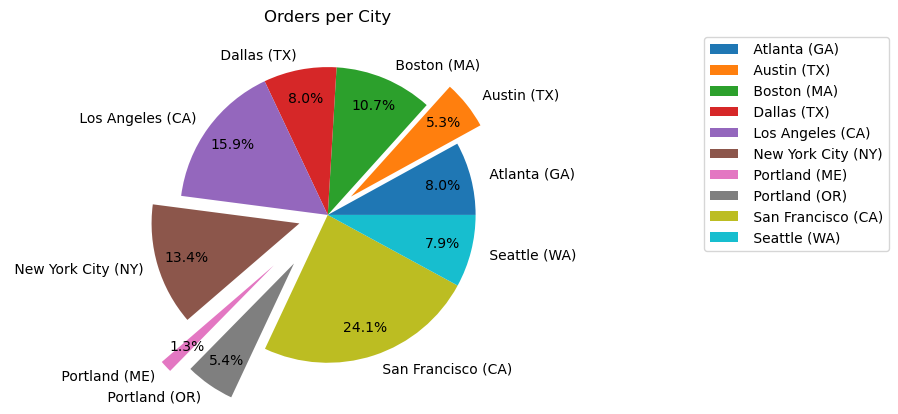

In [11]:
city_counts = p2_data.groupby("City")["Order ID"].count()

explode=(0,0.2,0,0,0,0.2,0.5,0.4,0,0)
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%',pctdistance=0.8,explode=explode)
plt.title("Orders per City")
plt.legend(loc="upper left",bbox_to_anchor=(1.5,1))
plt.show()

In [46]:
 p2_data.groupby("City")["Order ID"].count()

City
Atlanta (GA)          14881
Austin (TX)            9905
Boston (MA)           19934
Dallas (TX)           14820
Los Angeles (CA)      29605
New York City (NY)    24876
Portland (ME)          2455
Portland (OR)         10010
San Francisco (CA)    44732
Seattle (WA)          14732
Name: Order ID, dtype: int64

In [56]:
p2_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Q:Which Month had the highest number of sales?

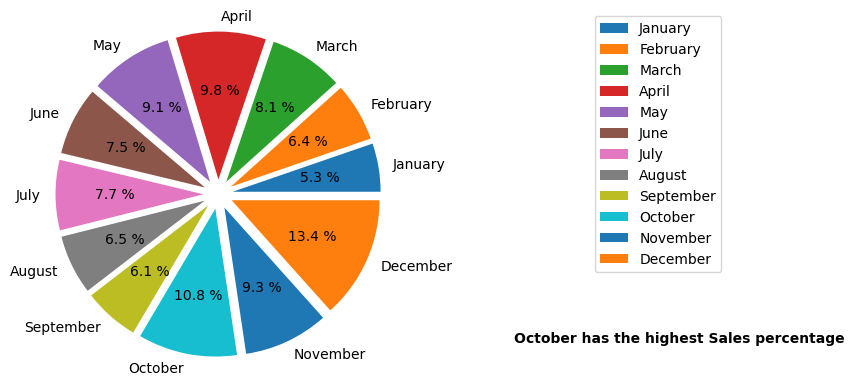

In [12]:

highest_sales = p2_data.groupby("Month")[["Sales"]].sum()
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
explode= (0.1,)*12
plt.pie(highest_sales['Sales'],labels=months, autopct="%1.1f %%",explode=explode)

plt.legend(loc="upper left",bbox_to_anchor=(1.5,1))
plt.text(2,-1,"October has the highest Sales percentage",fontweight='bold')
plt.show()

# What is the distribution of mean sales of each month?


In [16]:
p2_data.groupby('Month')[['Sales']].mean()

,Sales
Month,
1,187.687376
2,183.884962
3,185.250471
4,185.495390
5,190.305852
6,190.187565
7,185.249826
8,187.648849
9,180.497387


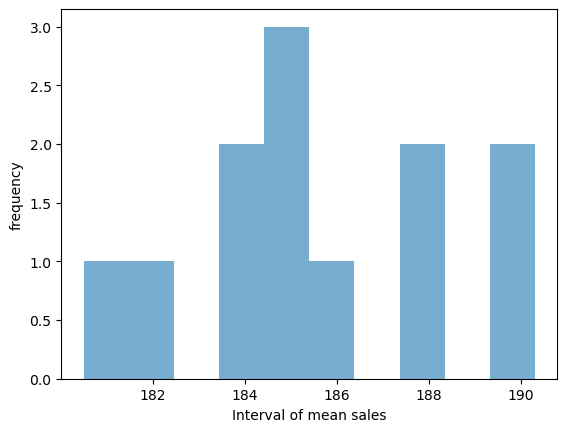

In [21]:
avg_sales=p2_data.groupby('Month')[['Sales']].mean()
plt.hist(avg_sales,bins=10,alpha=0.6)
plt.xlabel("Interval of mean sales")
plt.ylabel("frequency")
plt.show()

# What is the correlation between price and sales , explain graphically

In [22]:
p2_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [24]:
x= p2_data["Price Each"]
y=p2_data["Sales"]

In [25]:
correlation = np.corrcoef(x,y)
print(correlation[0,1])

0.9992029053029565


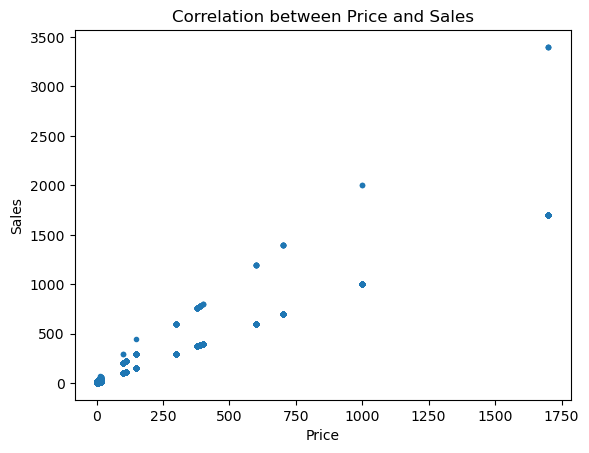

In [30]:
plt.scatter(x,y,marker='.')
plt.title("Correlation between Price and Sales")
plt.xlabel("Price")
plt.ylabel('Sales')
plt.show()